In [277]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append("../")

In [278]:
tires = {"hoosier_18x6_10x7":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = int(12 * 6.89476) # default pressure
velocity = int(25 * 1.60934) # default velocity
slip_angle = 0
run_num = 1

In [279]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}_run{run_num}.csv").apply(lambda x: x.round())
        tire["long"] = df[((df["V"] == velocity)  & (df["P"] == pressure) & (df["IA"] == camber) & (df["SA"] == slip_angle))]
        # print(tire["long"])
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}_run{run_num}.csv").apply(lambda x: x.round())
        tire["lat"] = df[((df["V"] == velocity) & (df["P"] == pressure) & (df["IA"] == camber))]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))


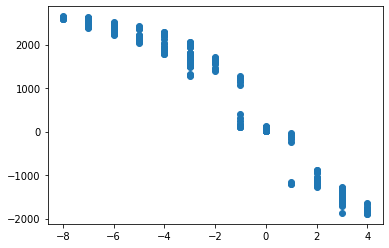

In [280]:
tire_1_df = [tire for _, tire in tires.items()][0]["lat"]
temp_df = tire_1_df[(tire_1_df["FZ"] > ((-250 - 5)/0.224809)) & (tire_1_df["FZ"] < ((-250 + 5)/0.224809))]
# print(temp_df)
plt.scatter(temp_df["SA"], temp_df["FY"])

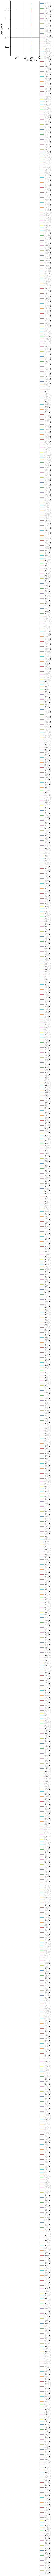

In [281]:
fig = plt.figure(figsize=(10,6))
count = 0
for name, tire in tires.items():
    if tire["long"] is not None:
        count += 1
        fig.add_subplot(1, 2, count)
        for load in tire["long"]["FZ"].unique():
            temp_df = tire["long"][tire["long"]["FZ"] == load]
            plt.plot(temp_df["SR"], temp_df["FX"], label = load)
        plt.legend()
        plt.ylabel("Long Force (N)")
        plt.xlabel("Slip Ratio (%)")
        plt.grid(True)
plt.show()

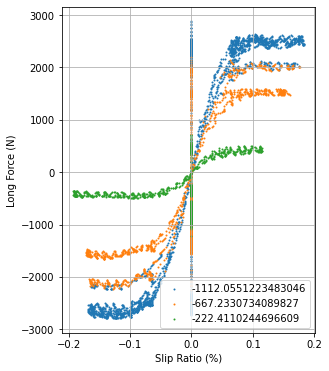

In [139]:
fig = plt.figure(figsize=(10,6))
count = 0
for name, tire in tires.items():
    if tire["long"] is not None:
        count += 1
        fig.add_subplot(1, 2, count)
        for load in tire["long"]["load"].unique():
            temp_df = tire["long"][tire["long"]["load"] == load]
            plt.scatter(temp_df["SL"], temp_df["FX"], label = load, s=1)
        plt.legend()
        plt.ylabel("Long Force (N)")
        plt.xlabel("Slip Ratio (%)")
        plt.grid(True)
plt.show()